# Автокодировщики

Объект описывается слишком большим количеством признаков? Хочется уменьшить их чилсло и не потерять важную информацию? Вам надоел PCA? Тогда автокодировщики идут к вам! 

## Почиташки 

* [Хорошая серия статей](https://habrahabr.ru/post/331382/) про автокодировщики и GAN. Немного подворовал код у них. 
* [Глава книги](http://www.deeplearningbook.org/contents/autoencoders.html) deep learning book, на которой основана серия сатей выше. 
* [Статья из блога про Keras](https://blog.keras.io/building-autoencoders-in-keras.html), на которой также основана статья выше (все воруют код у всех, просто ужас, блин). 
* [Неделя 4 курса Introduction to deep learning](https://www.coursera.org/learn/intro-to-deep-learning/home/week/4), с которой также взята часть материалов, и на которой я был ментором (возможно, что это оправдывает меня). Можно заодно [посмотреть тетрадку с этого курса.](https://github.com/hse-aml/intro-to-dl/blob/master/week4/Autoencoders-task.ipynb) Неожиданно, но она тоже с лицами...  Неожиданно, но код похож... Или даже сворован...

## Про автокодировщики 

Эпоха больших данных даёт нам слишком много данных. Часто хочется, чтобы их было немного поменьше, но при этом они выражали бы всю информацию о великом процессе порождения данных более ёмко. Не потерять в знании, но сэкономить! Именно из такого благородного помысла рождается метод главных компонент. Его посыл очень прост: давайте посмотрим на наши данные, найдём в них те направления, в которых происходит самое сильное изменение и оставим только их. При этом, в плане информации мы бы не потеряли особо много. Именно так часто поступают в случае, когда размерность данных очень большая. Находят $d$ Направлений, разброс в которых покрывает $90\%$ дисперсии, а остальное забывают. 

Например, если у нас есть выборка из карасей и щук и требуется научится отличать одних от ругих, то мы могли бы оставить только информацию о чешуйках, расположенных вдоль первой, более длинной компоненты. На качество нашего классификатора это бы повлияло слабо, но мы, при этом, избавились бы от лишней размерности, от оценки лишнего коэфициента и могли бы пустить большее число наблюдений на оценку меньшего числа параметров.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/PCA_fish.png/256px-PCA_fish.png)

Главная фишка метода главных компонент состоит в том, что он делает всю эту редукцию линейно. На самом деле все новые признаки будут представлять из себя линейные комбинации из старых. 

Идею такой редукции лишней информации можно обобщить до нелинейного случая и сделать прыжок к нейросетям, которые называются **автоэнокдерами.**  Автоэнкодеры учатся оставлять минимум информации так, чтобы по этому минимуму было возможно восстановить с очень высокой точностью исходную информацию. 

Автоэнкодеры — это нейронные сети прямого распространения, которые восстанавливают входной сигнал на выходе. Внутри у них имеется скрытый слой, который представляет собой код, описывающий модель. Автоэнкодеры конструируются таким образом, чтобы не иметь возможность точно скопировать вход на выходе. Обычно их ограничивают в размерности кода. 

![](https://hsto.org/web/cf6/228/613/cf6228613fdc4f8fb819cbd41bb677eb.png) 

Закодированную часть Входной сигнал восстанавливается с ошибками из-за потерь при кодировании, но, чтобы их минимизировать, сеть вынуждена учиться отбирать наиболее важные признаки.

Новый пример! Пусть у нас есть куча рукописных цифр и мы хотели бы научить компьютер понимать где какая цифра нарисована. Каждая цифра это картинка из пикселей размер $28 \times 28$. Всего у нас $28^2$ наблюдаемые переменные. Это слишком много! Явно не каждый пиксель несёт в себе информацию о том какая цифра нарисована на картинке. Большая часть пикселей бесполезна. 

Чтобы отобрать самые важные нелинейные комбинации из пикселей, мы можем сделать следующее: 

![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

Нейросеть получает на вход цифру, пытается оставить 10 самых важных нейлинейных комбинаций из пикселей, а после по этим самым важным комбинациям, она пытается восстановить цифру назад с как можно большей точностью. Ограничение на то сколько самых важных нелинейных пикселей должно остаться, заставляет нашу сетку стараться отобрать исключительно всё самое важное, что можно найти на картинке. Метод главных компонент будет частным, самым простым случаем, такой нейронной сетки. 

Первая часть автокодировщика $g(x)$ называется **encoder**. Она пытается закодировать картинку. Вторая часть $f(h)$ называет **decoder**. Она пытается раскодировать картинку. Автоэккодер, изменяя $f$ и $g$ пытается выучить тождественную функцию 

$$x = f(g(x)),$$ 

минимизируя какой-то функционал ошибки 

$$L(x, f(g(x))).$$ 

При этом выучить тождественную выборку он не может, так как в сердцевине находится  **бутылочное горлышко** с довольно маленьким числом нейронов. В итоге сетка вынуждена отаравлять в сердцевину только те комбинации фичей, по которым легче всего восстановить входные данные, и таким образом отсеивает ненужную информацию. В горлышке в результате обучения оказываются наши новые нелинейные фичи. 

In [10]:
import tensorflow as tf 
tf.__version__

'2.0.0'

In [11]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers as L

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Данные.

Будем учить свой автокодировщик для человеческих лиц. Пользоваться будем lfw-датасетом:

* http://vis-www.cs.umass.edu/lfw

In [176]:
!pip install scikit-learn==0.20.1

     |████████████████████████████████| 7.8MB 3.7MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
You should consider upgrading via the 'pip install --upgrade pip' command.


In [180]:
import sklearn
sklearn.__version__

'0.21.3'

In [2]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=0, resize=0.5, color=False,
                              slice_=(slice(94, 190, None), slice(78, 174, None)))

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
lfw_people.data.dtype

dtype('float32')

In [4]:
lfw_people.images.shape

(13233, 48, 48)

In [5]:
lfw_people.images[0].shape

(48, 48)

In [6]:
lfw_people.target_names[0] # имена людей

'AJ Cook'

In [31]:
from sklearn.model_selection import train_test_split

X = lfw_people.images
IMG_SHAPE = X.shape[1:]

X = X.astype('float32') / 255.0
X = X[...,None]
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

In [24]:
X.shape

(13233, 48, 48, 1)

(48, 48, 1)

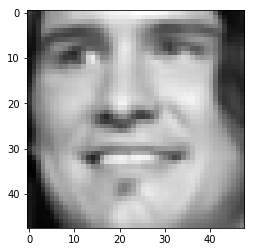

In [25]:
plt.imshow(X_train[1001,:,:,0], cmap='gray')
X_train[0].shape

Хочу ещё данных!

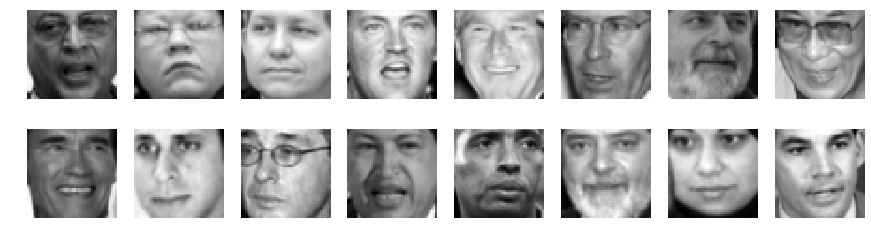

In [26]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(X_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_train[random_index,:,:,0], cmap='gray')
plt.show()

С этим можно уже учить модели. 

## 2. Собираем автокодировщик для PCA 

Как мы уже выяснили, простейшим автокодировщиком является PCA. Один слой на входе, бутылочное горлышко с новыми фичами, один слой на выходе и PCA готов. 

In [27]:
input_shape = X_train.shape[1:]
input_shape

(48, 48, 1)

In [28]:
np.prod(input_shape) # пикселей

2304

In [69]:
def build_pca_autoencoder(img_shape, code_size=72):
    # code_size это размерность кодированного представления (фичей на выходе)
    
    # Энкодер 
    encoder = Sequential()
    encoder.add(L.Input(img_shape))
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size))
    
    # Декодер 
    decoder = Sequential()
    decoder.add(L.Input(code_size))
    decoder.add(L.Dense(np.prod(img_shape)))
    decoder.add(L.Reshape(img_shape))
    
    return encoder,decoder

Осталось только собрать модель из моделей. 

In [71]:
# Сконструировали энкодер и декодер 
encoder, decoder = build_pca_autoencoder(input_shape, code_size=72)

inp = L.Input(input_shape)  # Вход
code = encoder(inp)         # Энкодер от входа 
reconstruction = decoder(code)  # Декодер от кода 

# Скрепили две наши сетки в одну общую модель
autoencoder = Model(inp, reconstruction)

# Собираем сеть с методом оптимизации и выбранной ошибкой 
autoencoder.compile('adam', 'mse') 

# Посмотрим на параметры 
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 48, 48, 1)]       0         
_________________________________________________________________
sequential_13 (Sequential)   (None, 72)                165960    
_________________________________________________________________
sequential_14 (Sequential)   (None, 48, 48, 1)         168192    
Total params: 334,152
Trainable params: 334,152
Non-trainable params: 0
_________________________________________________________________


In [72]:
encoder.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 72)                165960    
Total params: 165,960
Trainable params: 165,960
Non-trainable params: 0
_________________________________________________________________


In [73]:
decoder.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 2304)              168192    
_________________________________________________________________
reshape_6 (Reshape)          (None, 48, 48, 1)         0         
Total params: 168,192
Trainable params: 168,192
Non-trainable params: 0
_________________________________________________________________


Обратите внимание что энкодер восстанавливает вход на выходе. У нас нет меток для обучения, а надо, чтобы ими были сами по себе исходные картинки. Немного подправим генератор данных, чтобы это правда было так. 

In [74]:
# Обучаем модель 
hist_1 = autoencoder.fit(x = X_train, y = X_train,  # Обратите внимание что энкодер восстанавливает вход на выходе 
                epochs = 40,                        # Никакие y тут не нужны. Это просто лэйблы... 
                batch_size = 256,
                shuffle = True,
                validation_data = [X_test, X_test])

Train on 11909 samples, validate on 1324 samples
Epoch 1/40
11909/11909 [==============================] - 1s 98us/sample - loss: 0.0635 - val_loss: 0.0209
Epoch 2/40
11909/11909 [==============================] - 0s 34us/sample - loss: 0.0194 - val_loss: 0.0207
Epoch 3/40
11909/11909 [==============================] - 0s 34us/sample - loss: 0.0163 - val_loss: 0.0148
Epoch 4/40
11909/11909 [==============================] - 0s 33us/sample - loss: 0.0141 - val_loss: 0.0136
Epoch 5/40
11909/11909 [==============================] - 0s 33us/sample - loss: 0.0129 - val_loss: 0.0123
Epoch 6/40
11909/11909 [==============================] - 0s 37us/sample - loss: 0.0122 - val_loss: 0.0113
Epoch 7/40
11909/11909 [==============================] - 0s 34us/sample - loss: 0.0108 - val_loss: 0.0105
Epoch 8/40
11909/11909 [==============================] - 0s 38us/sample - loss: 0.0100 - val_loss: 0.0098
Epoch 9/40
11909/11909 [==============================] - 0s 36us/sample - loss: 0.0094 - val_l

Наш автокодировщик обучился. это довольно приятная новость. Попробуем отрисовать оригинальные изображения, их компактные представления и то как по этим представлениям изображения восстанавливаются. 

In [75]:
# Функция для отрисовки ооигинальных цифр, их представления и восстановленного рисунка
def visualize(img, encoder, decoder):
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img[:,:,0], cmap='gray')

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(reco.clip(0,1)[:,:,0], cmap='gray')
    plt.show()

Final MSE: 0.004074627918323496


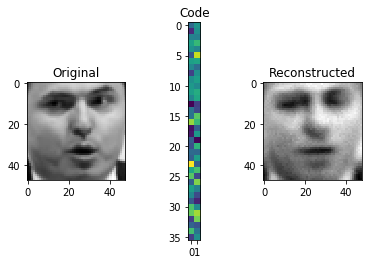

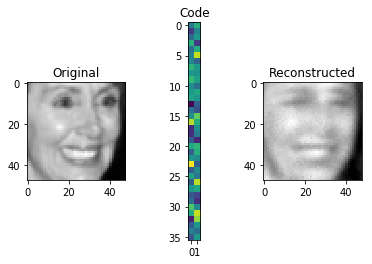

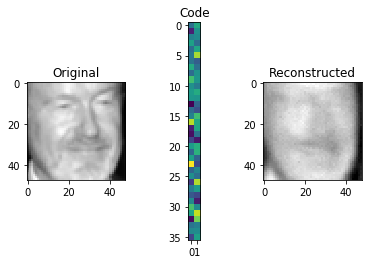

In [76]:
score = autoencoder.evaluate(X_test, X_test,verbose=0)
print("Final MSE:",score)

for i in range(3):
    img = X_test[i]
    visualize(img,encoder,decoder)

Проверить, что матрица весов из енкодера почти обратная для матрицы весов из декодера. 

In [77]:
W1 = autoencoder.layers[1].weights[0].numpy()
W1.shape

(2304, 72)

In [78]:
W2 = autoencoder.layers[2].weights[0].numpy()
W2.shape

(72, 2304)

In [79]:
np.round(W2@W1,1)

array([[ 0.9,  0. , -0. , ...,  0. ,  0. , -0. ],
       [ 0. ,  0.9,  0. , ...,  0. , -0.1, -0. ],
       [-0. ,  0. ,  0.6, ...,  0. ,  0.1, -0. ],
       ...,
       [ 0. ,  0. , -0. , ...,  1. , -0. , -0. ],
       [ 0. , -0. ,  0.1, ..., -0. ,  0.5,  0.1],
       [-0. , -0. , -0. , ...,  0. ,  0. ,  1. ]], dtype=float32)

Теперь по оставшимся 36 фичам (вместо оригинальных 784) можно строить классификаторы. Попробуйте на досуге заняться этим весёлым занятием, а мы движемся дальше. 

## 3 Глубокий автоэнкодер 

Всегда можно лучше! Сконструируем глубокий автокодировщик для вычленения нелинейных фичей. 

![ ](https://pbs.twimg.com/media/CYggEo-VAAACg_n.png:small)

* Обратите внимание, что при постройке автокодировщика не должно быть слоёв меньших, чем бутылочное горлышко (выход энкодера). 
* Также обратите внимание, что вполне уместно использовать свёртки и пулинг, но такой автокодировщик будет построен чуточку ниже. 

In [80]:
def build_deep_autoencoder(input_shape, code_size=72):
    # энкодер
    encoder = Sequential()
    encoder.add(L.Input(input_shape))
    encoder.add(L.Flatten())
    
    size = np.prod(input_shape)//2
    sizes = [ ] # для размеров слоёв
    
    while size > code_size:
        sizes.append(size)
        encoder.add(L.Dense(size, activation='relu'))
        encoder.add(L.BatchNormalization())
        size = size // 2       
    encoder.add(L.Dense(code_size))
    
    # декодер 
    decoder = Sequential()
    decoder.add(L.Input(code_size))
    for size in sizes[::-1]:
        decoder.add(L.Dense(size, activation='relu'))
        decoder.add(L.BatchNormalization())
    decoder.add(L.Dense(np.prod(input_shape)))
    decoder.add(L.Reshape(input_shape))
    
    return encoder,decoder

# Сконструировали энкодер и декодер 
encoder,decoder = build_deep_autoencoder(input_shape, code_size=36)

In [81]:
encoder.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 1152)              2655360   
_________________________________________________________________
batch_normalization_10 (Batc (None, 1152)              4608      
_________________________________________________________________
dense_40 (Dense)             (None, 576)               664128    
_________________________________________________________________
batch_normalization_11 (Batc (None, 576)               2304      
_________________________________________________________________
dense_41 (Dense)             (None, 288)               166176    
_________________________________________________________________
batch_normalization_12 (Batc (None, 288)             

In [82]:
decoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 72)                2664      
_________________________________________________________________
batch_normalization_15 (Batc (None, 72)                288       
_________________________________________________________________
dense_46 (Dense)             (None, 144)               10512     
_________________________________________________________________
batch_normalization_16 (Batc (None, 144)               576       
_________________________________________________________________
dense_47 (Dense)             (None, 288)               41760     
_________________________________________________________________
batch_normalization_17 (Batc (None, 288)               1152      
_________________________________________________________________
dense_48 (Dense)             (None, 576)             

In [83]:
# Объединили всё вместе и задали процедуру оптимизации для сетки
input_image = L.Input(input_shape)
z = encoder(input_image)
output_image = decoder(z)

autoencoder = Model(inputs=input_image, outputs=output_image)

autoencoder.compile(loss='mse', optimizer="adam")

In [84]:
# Обучаем модель 
hist_2 = autoencoder.fit(x = X_train, y = X_train,  # Обратите внимание что энкодер восстанавливает вход на выходе 
                epochs = 40,                        # Никакие y тут не нужны. Это просто лэйблы... 
                batch_size = 256,
                shuffle = True,
                validation_data=[X_test, X_test])

Train on 11909 samples, validate on 1324 samples
Epoch 1/40
11909/11909 [==============================] - 9s 770us/sample - loss: 0.2578 - val_loss: 0.7755
Epoch 2/40
11909/11909 [==============================] - 5s 435us/sample - loss: 0.0212 - val_loss: 0.1009
Epoch 3/40
11909/11909 [==============================] - 6s 509us/sample - loss: 0.0176 - val_loss: 0.0362
Epoch 4/40
11909/11909 [==============================] - 6s 480us/sample - loss: 0.0171 - val_loss: 0.0247
Epoch 5/40
11909/11909 [==============================] - 6s 464us/sample - loss: 0.0164 - val_loss: 0.0224
Epoch 6/40
11909/11909 [==============================] - 6s 464us/sample - loss: 0.0161 - val_loss: 0.0182
Epoch 7/40
11909/11909 [==============================] - 6s 472us/sample - loss: 0.0162 - val_loss: 0.0172
Epoch 8/40
11909/11909 [==============================] - 6s 477us/sample - loss: 0.0156 - val_loss: 0.0158
Epoch 9/40
11909/11909 [==============================] - 6s 468us/sample - loss: 0.015

Final MSE: 0.01323414023324082


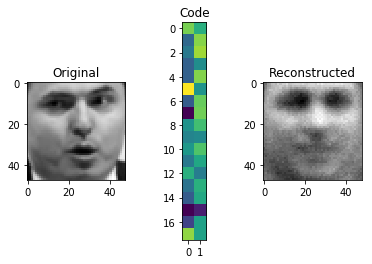

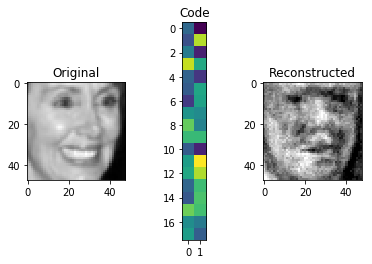

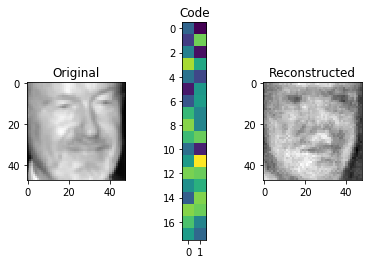

In [86]:
score = autoencoder.evaluate(X_test, X_test,verbose=0)
print("Final MSE:",score)

for i in range(3):
    img = X_test[i]
    visualize(img,encoder,decoder)

## 4. Свёрточный автокодировщик 

Добавим свёрточные слои и немного макспулинга.  Часть, которая относится к энкодеру будет стандартной. Это просто свёрточные слои и пулинг. Кончается она обычным свёрточным слоем с `code_size` нейронов. В качестве функции активации берите `elu`. 

Попробуйте повторить свёртку и пулинг $2\times2$ четыре раза с ядром размера $3 \times 3$ и `padding='same'`. У слоёв поставьте число каналов: $32$, $64$, $128$, $256$.


Для декодера мы будем использовать 

`L.Conv2DTranspose(filters=?, kernel_size=(3, 3), strides=2, activation='elu', padding='same')`

и

`UpSampling2D((2,2))`. 

Сначала попробуйте скомбинировать эти два варианта, а после вспомните объяснение про `Conv2DTranspose` с предыдущей пары :) 

In [156]:
def build_conv_autoencoder(input_shape, code_size=72):
    
    encoder = Sequential()
    encoder.add(L.Input(input_shape))
    for i in range(2, 6):
        encoder.add(L.Conv2D(2**i, kernel_size=(3,3), 
                             padding="same", activation='elu'))
        encoder.add(L.MaxPool2D(pool_size=(2,2)))
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size))
    
    beast_shape = encoder.layers[-3].output.shape[1:]

    decoder = Sequential()
    decoder.add(L.Input(code_size))
    decoder.add(L.Dense(np.prod(beast_shape), activation='elu'))
    decoder.add(L.Reshape(beast_shape))
    
    for i in range(5,1,-1):
        decoder.add(L.Conv2DTranspose(filters=2**i, kernel_size=(3, 3), 
                          strides=2, activation='elu', padding='same'))
    
    decoder.add(L.Conv2D(filters=1, kernel_size=(3,3), padding='same'))
    return encoder,decoder

In [157]:
encoder,decoder = build_conv_autoencoder(input_shape, code_size=72)

# Объединили всё вместе и задали процедуру оптимизации для сетки
input_image = L.Input(input_shape)
z = encoder(input_image)
output_image = decoder(z)

autoencoder = Model(inputs=input_image, outputs=output_image)

sgd = tf.keras.optimizers.Adam(lr=1e-4, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

autoencoder.compile(loss='mse', optimizer=sgd)

In [158]:
# Посмотрим на параметры 
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_61 (InputLayer)        [(None, 48, 48, 1)]       0         
_________________________________________________________________
sequential_51 (Sequential)   (None, 72)                26952     
_________________________________________________________________
sequential_52 (Sequential)   (None, 48, 48, 1)         63841     
Total params: 90,793
Trainable params: 90,793
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Модель будет обучаться ну оооочень долго... 
# Ошибка падает довольно быстро, добавлять свёртку было хорошей идеей
hist_3 = autoencoder.fit(X_train, X_train,
                        epochs=10,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(X_test, X_test))

Train on 11909 samples, validate on 1324 samples
Epoch 1/10
11909/11909 [==============================] - 19s 2ms/sample - loss: 0.0654 - val_loss: 0.0377
Epoch 2/10
11909/11909 [==============================] - 19s 2ms/sample - loss: 0.0333 - val_loss: 0.0302
Epoch 3/10
11909/11909 [==============================] - 20s 2ms/sample - loss: 0.0284 - val_loss: 0.0271
Epoch 4/10
11909/11909 [==============================] - 18s 2ms/sample - loss: 0.0260 - val_loss: 0.0253
Epoch 5/10
11909/11909 [==============================] - 18s 2ms/sample - loss: 0.0244 - val_loss: 0.0240
Epoch 6/10
11909/11909 [==============================] - 18s 2ms/sample - loss: 0.0233 - val_loss: 0.0229
Epoch 7/10
11909/11909 [==============================] - 20s 2ms/sample - loss: 0.0222 - val_loss: 0.0219
Epoch 8/10
11909/11909 [==============================] - 19s 2ms/sample - loss: 0.0211 - val_loss: 0.0206
Epoch 9/10
11909/11909 [==============================] - 18s 2ms/sample - loss: 0.0197 - val_l

Final MSE: 0.01810974533756874


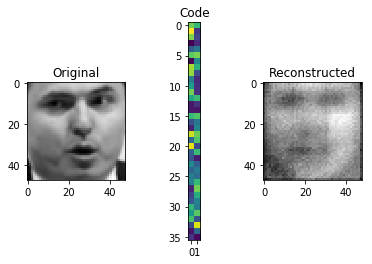

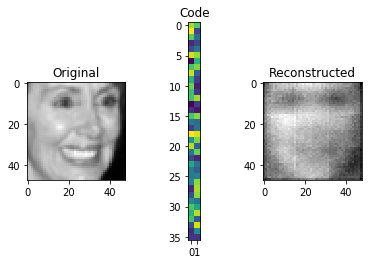

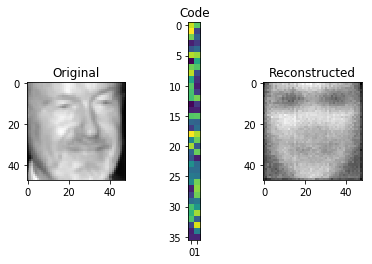

In [162]:
score = autoencoder.evaluate(X_test, X_test,verbose=0)
print("Final MSE:",score)

for i in range(3):
    img = X_test[i]
    visualize(img,encoder,decoder)

## 5. Denoising автоэнкодер 

Автоэнкодеры можно обучить убирать шум из данных: для этого надо на вход подавать зашумленные данные и на выходе сравнивать с данными без шума. Создадим модель, которая будет зашумлять входное изображение, а после пытаться избавить его от шума. 

In [163]:
# Добавляем на картинку немного шума 
def apply_gaussian_noise(X,sigma=0.01):
    return X + sigma*np.random.normal(loc=0.0, scale=1.0, size=X.shape) 

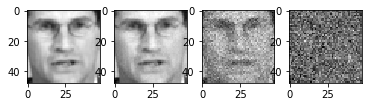

In [164]:
plt.subplot(1,4,1)
plt.imshow(X_train[0].reshape(48, 48), cmap = 'gray')
plt.subplot(1,4,2)
plt.imshow(apply_gaussian_noise(X_train[:1],sigma=0.01)[0].reshape(48, 48), cmap = 'gray')
plt.subplot(1,4,3)
plt.imshow(apply_gaussian_noise(X_train[:1],sigma=0.1)[0].reshape(48, 48), cmap = 'gray')
plt.subplot(1,4,4)
plt.imshow(apply_gaussian_noise(X_train[:1],sigma=0.5)[0].reshape(48, 48), cmap = 'gray');

In [165]:
# Зашумляем данные 
X_train_noisy = apply_gaussian_noise(X_train, sigma=0.1)
X_test_noisy = apply_gaussian_noise(X_test, sigma=0.1)

# Убираем все заскоки за отрезок [0;1]
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

Собираем сеточку из предыдущего пункта.

In [166]:
# размер горлышка имеет смысл взять побольше (почему?)
encoder_noisy, decoder_noisy = build_deep_autoencoder(input_shape, 
                                                      code_size=1024)

inp = L.Input(input_shape)
code = encoder_noisy(inp)
reconstruction = decoder_noisy(code)

autoencoder_noisy = Model(inp, reconstruction)
autoencoder_noisy.compile('adam', 'mse')

autoencoder_noisy.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_64 (InputLayer)        [(None, 48, 48, 1)]       0         
_________________________________________________________________
sequential_53 (Sequential)   (None, 1024)              3840640   
_________________________________________________________________
sequential_54 (Sequential)   (None, 48, 48, 1)         3841920   
Total params: 7,682,560
Trainable params: 7,677,952
Non-trainable params: 4,608
_________________________________________________________________


In [167]:
hist_noise = autoencoder_noisy.fit(X_train_noisy, X_train,
                        epochs=10,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(X_test_noisy, X_test))

Train on 11909 samples, validate on 1324 samples
Epoch 1/10
11909/11909 [==============================] - 6s 505us/sample - loss: 0.2590 - val_loss: 0.7527
Epoch 2/10
11909/11909 [==============================] - 6s 471us/sample - loss: 0.0228 - val_loss: 0.1225
Epoch 3/10
11909/11909 [==============================] - 6s 469us/sample - loss: 0.0140 - val_loss: 0.0400
Epoch 4/10
11909/11909 [==============================] - 6s 484us/sample - loss: 0.0132 - val_loss: 0.0210
Epoch 5/10
11909/11909 [==============================] - 6s 545us/sample - loss: 0.0126 - val_loss: 0.0161
Epoch 6/10
11909/11909 [==============================] - 6s 504us/sample - loss: 0.0119 - val_loss: 0.0142
Epoch 7/10
11909/11909 [==============================] - 6s 495us/sample - loss: 0.0113 - val_loss: 0.0127
Epoch 8/10
11909/11909 [==============================] - 6s 496us/sample - loss: 0.0107 - val_loss: 0.0130
Epoch 9/10
11909/11909 [==============================] - 6s 503us/sample - loss: 0.011

Final MSE: 0.01207632456661351


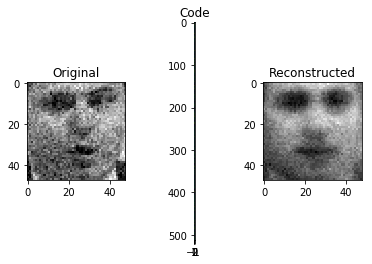

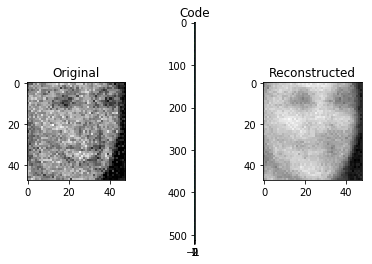

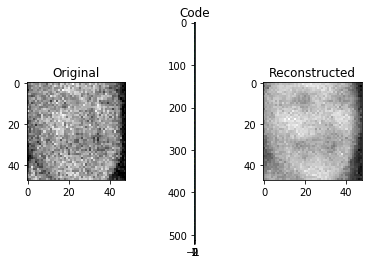

In [169]:
score = autoencoder_noisy.evaluate(X_test_noisy, X_test,verbose=0)
print("Final MSE:",score)

for i in range(3):
    img = X_test_noisy[i]
    visualize(img,encoder_noisy,decoder_noisy)

## 6.  Поиск похожих изображений 

С помощью найденного горлышка можно искать похожие друг на друга изображения. Чтобы ускорить процесс поиска, мы будем использовать похожий на метод ближайших соседей, но более быстрый алгоритм под названием [Locality Sensitive Hashing forest.](http://scikit-learn.org/0.16/modules/generated/sklearn.neighbors.LSHForest.html)

In [170]:
images = X_train
codes = encoder.predict(images)

# хорошая идея ставить по ходу архитекрутуры проверки на размерности :) 
assert len(codes) == len(images)

In [171]:
import sklearn
sklearn.__version__

'0.21.3'

In [183]:
from sklearn.neighbors import NearestNeighbors
lshf = NearestNeighbors(n_neighbors=50).fit(codes)

In [184]:
def get_similar(image, n_neighbors=5):
    
    code = encoder.predict(image[None])
    
    (distances,),(idx,) = lshf.kneighbors(code,n_neighbors=n_neighbors)
    
    return distances,images[idx]

In [185]:
def show_similar(image):
    
    distances,neighbors = get_similar(image,n_neighbors=11)
    
    plt.figure(figsize=[8,6])
    plt.subplot(3,4,1)
    plt.imshow(image.reshape(48,48), cmap = 'gray')
    plt.title("Original image")
    
    for i in range(11):
        plt.subplot(3,4,i+2)
        plt.imshow(neighbors[i].reshape(48,48), cmap = 'gray')
        plt.title("Dist=%.3f"%distances[i])
    plt.show()

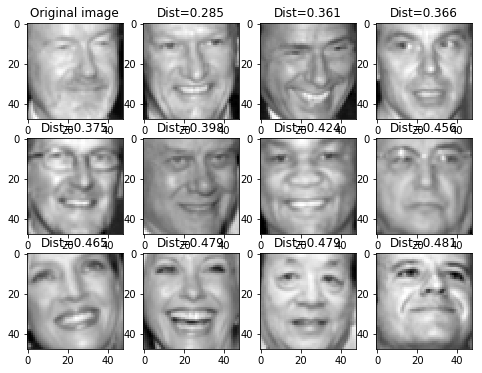

In [186]:
show_similar(X_test[2])

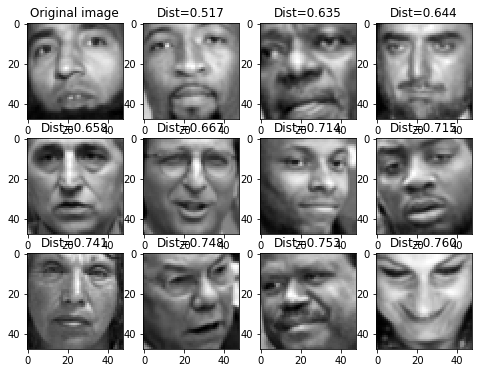

In [187]:
show_similar(X_test[500])

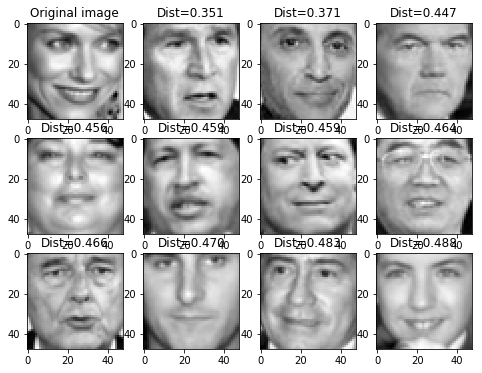

In [188]:
show_similar(X_test[66])

## 7.  Прогулка по пространству эмбедингов.

Можно брать два эмбединга, искать между ними линейную комбинацию и пытаться прогуляться от одного к другому. Попробуйте вытащить из для двух заданных изображений `image1` и `image2` несколько линейных комбинаций эмбедингов и посмотреть как выглядит картинка с плавным переходом от одной картинки к другой. 

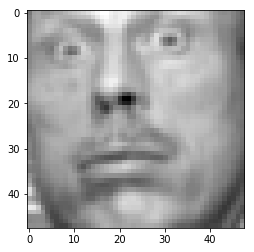

In [238]:
plt.imshow(image1[:,:,0], cmap='gray')

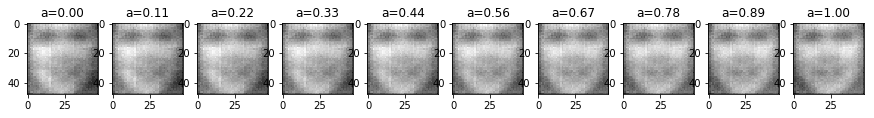

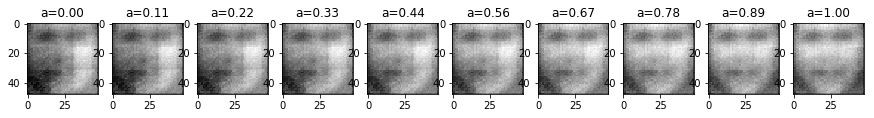

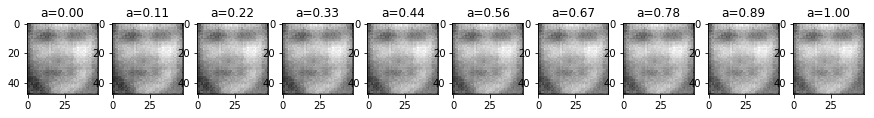

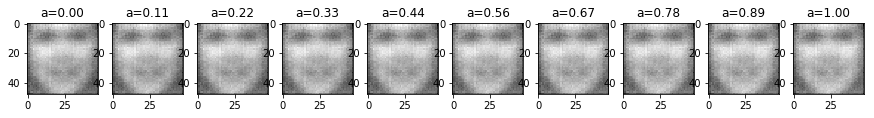

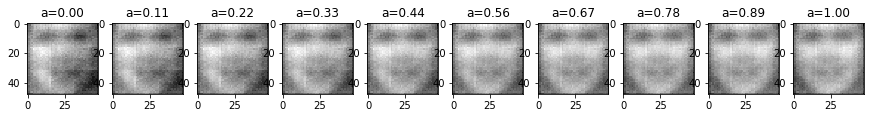

In [224]:
path_len = 10

for _ in range(5):
    image1, image2 = X_test[np.random.randint(0,len(X_test),size=2)]

    code1, code2 = encoder(np.stack([image1, image2]))

    plt.figure(figsize=[15,6])
    for i,a in enumerate(np.linspace(0,1,num=path_len)):
        
        code_avg = a * code1 + (1 - a) * code2
        output_image = decoder(code_avg[None, ...])

        plt.subplot(1, path_len, i+1)
        plt.imshow(output_image[0,:,:,0], cmap = 'gray')
        plt.title("a=%.2f"%a)        
    plt.show()

In [194]:
path_len = 10
np.linspace(0,1,num=path_len)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])